In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
import random

In [5]:
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
from tensorflow.keras.layers import CategoryEncoding, Embedding, GlobalAveragePooling1D, SimpleRNN

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Input, Dense

In [13]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

## Importar os dados

In [15]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")

In [16]:
# df

In [17]:
news_df = df[ ["Description", "Type"] ] 

In [18]:
news_df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

In [19]:
tokenizer = Tokenizer()

In [20]:
tokenizer.fit_on_texts( news_df["Description"] )

In [21]:
max_palavras_dicionario = len(tokenizer.index_word)
max_palavras_dicionario

20859

In [22]:
tokenizer.index_word[12892]

'kaitlyn'

In [23]:
sequencias = tokenizer.texts_to_sequences( news_df["Description"] )

In [24]:
len(sequencias)

3500

In [25]:
print("Tamanho Sequencia 0: ", len(sequencias[0]))
print("Tamanho Sequencia 1: ", len(sequencias[1]))
print("Tamanho Sequencia 2: ", len(sequencias[2]))

Tamanho Sequencia 0:  58
Tamanho Sequencia 1:  15
Tamanho Sequencia 2:  77


In [26]:
max_features = 0
for sequencia in sequencias:
    if len(sequencia) > max_features:
        max_features = len(sequencia)
max_features

112

In [62]:
sequences_padded = pad_sequences( sequencias, padding="pre" )

In [64]:
print("Tamanho Sequencia 0: ", len(sequences_padded[0]))
print("Tamanho Sequencia 1: ", len(sequences_padded[1]))
print("Tamanho Sequencia 2: ", len(sequences_padded[2]))

Tamanho Sequencia 0:  112
Tamanho Sequencia 1:  112
Tamanho Sequencia 2:  112


In [66]:
sequences_padded

array([[    0,     0,     0, ...,   223,  7796,    17],
       [    0,     0,     0, ...,    81,    12, 12900],
       [    0,     0,     0, ...,    27,    62,   430],
       ...,
       [    0,     0,     0, ...,  1070,   216,    17],
       [    0,     0,     0, ...,  1873,     6,    93],
       [    0,     0,     0, ...,    18,     9,    17]])

## Codificando as saidas

['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology']

Business = [ 1, 0, 0, 0, 0, 0, 0 ]
Entertainment = [ 0, 1, 0, 0, 0, 0, 0 ]
General = [ 0, 0, 1 , 0, 0, 0, 0 ]

In [69]:
output_encoder = LabelEncoder()

In [71]:
output_numeric = output_encoder.fit_transform( news_df["Type"] )
output_numeric

array([0, 0, 0, ..., 6, 6, 6])

Saida será algo como [ 0.2, 0.5, 0.3, 0.8, 0.1, 0.0, 0.6 ] 

In [74]:
output_encoder = CategoryEncoding(num_tokens=7, output_mode="one_hot")
output_encoded = output_encoder( output_numeric )  # Não funciona precisa transformar para numeros primeiro
output_encoded

<tf.Tensor: shape=(3500, 7), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [78]:
X = sequences_padded
print("X Shape: ", X.shape)
Y = output_encoded.numpy()
print("Y Shape: ", Y.shape)

X Shape:  (3500, 112)
Y Shape:  (3500, 7)


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, random_state = 100 )

In [82]:
seed_value = 100
# Assegura que todos os pesos iniciais serão gerados com a mesma semente
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [38]:
# modelo = Sequential()
# modelo.add( Input( (112,) ) )
# modelo.add( Dense( 128, activation="relu" ) )
# modelo.add( Dense( 7, activation="softmax" ) )
# modelo.summary()

In [96]:
modelo = Sequential()
modelo.add( Embedding( input_dim=(max_palavras_dicionario + 1), output_dim=100 ) )
# modelo.add( GlobalAveragePooling1D() )
modelo.add( SimpleRNN( 64 ) )
modelo.add( Dense( 7, activation="softmax" ) )
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [98]:
# opt = SGD(learning_rate = 0.000001)
# opt = Adam(learning_rate = 0.000001)
opt = RMSprop(learning_rate=0.001)
modelo.compile(optimizer = opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [100]:
resultado = modelo.fit(X_train, Y_train, epochs=5, batch_size=32)

Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3049 - loss: 1.8065
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8439 - loss: 0.8971
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9470 - loss: 0.3425
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9648 - loss: 0.1673
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9710 - loss: 0.1082


In [102]:
resultado_teste = modelo.evaluate(X_test, Y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5661 - loss: 1.3436


Treinamento RNN(32) em 40 epocas : Accuracy: 0.5495 - loss: 2.1273
Treinamento RNN(32) em 20 epocas : Accuracy: 0.5313 - loss: 2.4749
Treinamento RNN(32) em 20 epocas (pre-padding): Accuracy: 0.5796 - loss: 1.6331
Treinamento RNN(32) em 5 epocas (pre-padding): Accuracy: 0.5812 - loss: 1.6984
Treinamento RNN(64) em 5 epocas (pre-padding): Accuracy: 0.5661 - loss: 1.3436

['Business', 'Entertainment', 'General', 'Health', 'Science', 'Sports', 'Technology']

Business = [ 1, 0, 0, 0, 0, 0, 0 ] 
Entertainment = [ 0, 1, 0, 0, 0, 0, 0 ] 
General = [ 0, 0, 1, 0, 0, 0, 0 ]
Health = [ 0, 0, 0, 1, 0, 0, 0 ]
Science = [ 0, 0, 0, 0, 1, 0, 0 ]
Sports = [ 0, 0, 0, 0, 0, 1, 0 ]
Technology = [ 0, 0, 0, 0, 0, 0, 1 ]

In [50]:
frase = "Climate changes generative heat waves"
sequencia_predict = np.array(tokenizer.texts_to_sequences( [frase] ))
print("sequencia_predict: ", sequencia_predict.shape)
sequencia_predict_padded = pad_sequences( sequencia_predict, maxlen=max_features, padding="post" )
print("sequencia_predict_padded:", sequencia_predict_padded.shape)
previsao = modelo.predict( sequencia_predict_padded )
print("Previsao: ", previsao)
np.argmax(previsao)

sequencia_predict:  (1, 5)
sequencia_predict_padded: (1, 112)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Previsao:  [[6.5572985e-04 9.8525131e-01 3.2109706e-04 7.3226349e-04 1.1592829e-02
  4.3868145e-04 1.0080555e-03]]


1

In [52]:
acuracia = np.array(resultado.history['accuracy'])
acuracia_norm = acuracia / np.max(acuracia)
loss = np.array(resultado.history['loss'])
loss_norm = loss / np.max(loss)

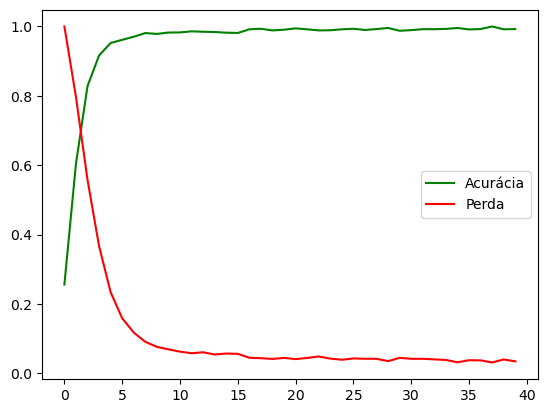

In [54]:
plt.plot(acuracia_norm, color="green", label="Acurácia")
plt.plot(loss_norm, color="red", label="Perda")
plt.legend()
plt.show()